In [29]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib as mpl

# Basic_Mathematics

> # 1. 벡터와 행렬

### Data Types
* **scalar** - 하나의 숫자만으로 이루어진 데이터
  * $x$ (알파벳 소문자)로 표현
* **vector** - 여러 개의 숫자가 특정한 순서대로 모여 있는 것 / 하나의 열의 형태로 표현 / 벡터를 이루는 데이터의 개수를 차원이라고 한다
  * feature vector - 예측 문제에 사용되는 데이터 벡터
  * column vector - 벡터를 $N \times 1$의 행렬로 인식
  * $\mathbf{x}$ (볼드체의 알파벳 소문자)로 표현
* **matrix** - 복수의 차원을 가지는 데이터 레코드가 여러 개 있는 경우 데이터를 합쳐서 표기한 것
  * feature matrix - 예측 문제에 사용되는 데이터 행렬
  * $X$ (알파벳 대문자)로 표현
----
* **하나의 데이터 레코드를 단독으로 벡터로 나타낼 때는 하나의 열(column)로 표기**
* ** 복수의 데이터 레코드 집합을 행렬로 나타낼 때는 하나의 데이터 레코드가 하나의 행(row)으로 표기**

### Data Types - Numpy

In [30]:
scalar1 = 1.0
vector1 = np.array([[1.0], [2.0], [3.0], [4.0]])  #Scikit-Learn 패키지 사용시 반드시 이 형태 NX1 형태 사용
vector2 = np.array([1.0, 2.0, 3.0, 4.0])
matrix1 = np.array([[1,2,3],[4,5,6]])

### 행렬의 행 표기법과 열 표기법
* NumPy에서는 ndarray 객체의 T라는 속성을 이용하여 전치 행렬을 구한다
* 이 때 T는 메서드(method)가 아닌 속성(attribute)이므로 ()를 붙여서 호출하면 안된다.

$$ X = \begin{bmatrix} c_1 & c_2 & \cdots & c_M \\ \end{bmatrix} = \begin{bmatrix} r_1^T \\ r_2^T \\ \vdots \\ r_N^T \\  \end{bmatrix}$$


### 특수한 벡터와 행렬
* 영 벡터 - 모든 원소가 0 / 문맥에 의해 크기를 알 수 있을 때에는 아래첨자 N 생략 가능
* 일 벡터 - 모든 원소가 1 / 문맥에 의해 크기를 알 수 있을 때에는 아래첨자 N 생략 가능
----
* 정방행렬(square matrix) - 행과 열의 크기가 같음
* 대각행렬(diagonal matrix) - off-diagonal 요소가 0인 정방행렬
* 단위행렬(identity matrix) - 모든 diagonal 요소가 1인 대각행렬
* 대칭행렬(symmetric matrix) - 전치 행렬과 원래 행렬이 같은 행렬

### 대각행렬 / 단위행렬 - numpy

In [31]:
np.diag([1,2,3]) #대각행렬
np.identity(3) #단위행렬
np.eye(3) #단위행렬

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### 벡터와 행렬의 덧셈과 뺄셈 (element-wise operation)

In [32]:
x = np.array([1, 1, 1, 1, 1])
y = np.array([2, 2, 2, 2, 2])
print(x + y, x-y)

[3 3 3 3 3] [-1 -1 -1 -1 -1]


### 벡터의 내적 (inner product *or* dot product)
* 두 벡터의 길이가 같고 / 앞의 벡터가 행 벡터이고 뒤의 벡터가 열 벡터일 때만 가능
$$ x^T y = \begin{bmatrix}x_{1} & x_{2} & \cdots & x_{N} \end{bmatrix}\begin{bmatrix}y_{1} \\y_{2} \\\vdots \\y_{N} \\\end{bmatrix} = x_1y_1 + \cdots + x_N y_N = \sum_{i=1}^N x_i y_i$$

### 벡터의 내적 - numpy

In [33]:
# 2차원 배열을 곱하는 경우 전치연산 필요
# 결과는 1X1 행렬이다
x = np.array([[1], [2], [3]])
y = np.array([[4], [5], [6]])
np.dot(x.T, y)[0, 0] 

# 1차원 배열을 곱하는 경우 전치연산 불필요
# 결과는 스칼라이다
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
np.dot(x, y)

32

### 가중합 (weighted sum)
* 복수의 데이터에 가중치 값을 곱한 후 다시 합한 것 / 선형 조합(linear combination)이라고도 함
$$ w_1 x_1 + \cdots + w_N x_N = \sum_{i=1}^N w_i x_i   $$ 
$$= w^Tx$$

### 평균 (average)
* 벡터로 표현된 $N$개의 데이터의 단순 평균은 가중치값이 모두  $\dfrac{1}{N}$인 가중합과 같다.
$$
\bar{x} = \dfrac{1}{N}\sum_{i=1}^N x_i = \dfrac{1}{N} \mathbf{1}_N^T x
$$

### 평균 - numpy

In [34]:
x = np.arange(10)
x.mean() 

# 또는

N = len(x)
np.dot(np.ones(N), x) / N

4.5

### 제곱합 (sum of squares)
$$
x^T x = 
\begin{bmatrix}
x_{1} & x_{2} & \cdots & x_{N} 
\end{bmatrix}
\begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{N} \\
\end{bmatrix} = \sum_{i=1}^{N} x_i^2
$$

### 선형 회귀 모형 (linear regression model)
* 독립 변수 $x$에서 종속 변수 $y$를 예측하기 위한 방법의 하나
* 독립 변수 벡터 $x$ 와 가중치 벡터 $w$와의 가중합으로 ${y}$와 가장 비슷한 값 $\hat{y}$를 계산하는 수식을 말함

$$ \hat{y} = w_1 x_1 + \cdots + w_N x_N$$

* 이 수식은 벡터의 곱으로 표현 할 수 있다.

$$ \hat{y} = w^Tx$$

* 여기에서 가장 비슷한 값이라고 한 이유는 우리가 원하는 $y$와 정확히 똑같은 값을 만들어주는 가중치 벡터 $w$를 찾을 수 없는 경우가 많기 때문이다. 이 경우에는 원래의 $y$와 가장 비슷한 $\hat{y}$ 값이라도 계산해 주는 가중치 벡터 $w$로 만족해야 한다.

### 행렬의 곱셈(내적)
$$ C = AB \; \rightarrow \; c_{ij} = a_i^T b_j $$
$$ A \in \mathbf{R}^{N \times L} , \; B \in \mathbf{R}^{L \times M} \;  \rightarrow \; AB \in \mathbf{R}^{N \times M} $$

### 행렬의 곱셉 - numpy

In [35]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 2], [3, 4], [5, 6]])
C = np.dot(A, B)
C

array([[22, 28],
       [49, 64]])

### 교환 법칙과 분배 법칙
$$ AB \neq BA $$

$$ A(B + C) = AB + AC $$

$$ (A + B)C = AC + BC $$

$$ (A + B)^T = A^T + B^T $$

$$ (AB)^T = B^T A^T $$

$$ (ABC)^T = C^T B^T A^T $$

$$ ABC = (AB)C = A(BC) $$

$$ ABCD = ((AB)C)D = (AB)(CD) = A(BCD) = A(BC)D $$

$$ AI = IA = A $$

### 여러 개의 벡터에 대한 가중합
$$ \hat{y} = Xw $$

$$ \begin{eqnarray} \hat{y} = \begin{bmatrix} \hat{y}_1 \\ \hat{y}_2 \\ \vdots \\ \hat{y}_M \\ \end{bmatrix}=\begin{bmatrix} w_1 x_{1,1} + w_2 x_{1,2} + \cdots + w_N x_{1,N} \\ w_1 x_{2,1} + w_2 x_{2,2} + \cdots + w_N x_{2,N} \\ \vdots  \\ w_1 x_{M,1} + w_2 x_{M,2} + \cdots + w_N x_{M,N} \\ \end{bmatrix} =\begin{bmatrix} x_{1,1} & x_{1,2} & \cdots & x_{1,N} \\ x_{2,1} & x_{2,2} & \cdots & x_{2,N} \\ \vdots & \vdots & \vdots & \vdots \\ x_{M,1} & x_{M,2} & \cdots & x_{M,N} \\ \end{bmatrix} \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_N \end{bmatrix}  = \begin{bmatrix} x_1^T \\ x_2^T \\ \vdots \\ x_M^T \\ \end{bmatrix} \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_N \end{bmatrix} = X w  \end{eqnarray} $$

### 잔차(Residual)와 제곱합(RSS, Residual Sum of Squares)

$$ e = y - Xw $$ 

$$ \begin{eqnarray}e &=&\begin{bmatrix}e_{1} \\e_{2} \\\vdots \\e_{M} \\\end{bmatrix}=\begin{bmatrix}y_{1} \\y_{2} \\\vdots \\y_{M} \\\end{bmatrix}-\begin{bmatrix}x^T_{1}w \\x^T_{2}w \\\vdots \\x^T_{M}w \\\end{bmatrix}=y - Xw\end{eqnarray}$$

$$ \sum_{i=1}^{N} e_i^2 = \sum_{i=1}^{N} (y_i - w^Tx_i)^2 = e^Te =  (y - Xw)^T (y - Xw) = y^Ty - w^TX^Ty - y^TXw + w^TX^TXw $$

### 이차 형식 (Quadratic Form) - 행벡터 X 정방 행렬 X 열벡터
* 행렬의 부호: 영 벡터가 아닌 모든 벡터 x에 대해
  * **양-한정**(positive definite): $ x^T A x > 0$
  * **양-반한정**(positive semi-definite): $ x^T A x \geq 0$ 

$$ \begin{eqnarray} x^T A x &=& \begin{bmatrix}x_{1} & x_{2} & \cdots & x_{N} \end{bmatrix}\begin{bmatrix}a_{1,1} & a_{1,2} & \cdots &a_{1,N} \\a_{2,1} & a_{2,2} & \cdots & a_{2,N} \\\vdots & \vdots & \ddots & \vdots \\a_{N,1} & a_{N,2} & \cdots & a_{N,N} \\\end{bmatrix}\begin{bmatrix}x_{1} \\x_{2} \\\vdots \\x_{N} \\\end{bmatrix} \end{eqnarray}$$ 
$$\begin{eqnarray} &=& \sum_{i=1}^{N}\sum_{j=1}^{N} a_{i,j} x_i x_j \end{eqnarray}$$

### 행렬의 크기 - Norm, Trace, Determinant

### Norm
* **프로베니우스 놈**(Frobenius norm): L = 2
* 벡터의 놈의 제곱은 그 벡터의 제곱합과 같다
$$ \Vert A \Vert_L = \left( \sum_{i=1}^M \sum_{j=1}^N |a_{ij}|^L \right)^{1/L} $$

### Norm - numpy (Frobenius norm)

In [36]:
A = np.arange(9).reshape(3, 3)
np.linalg.norm(A)

14.2828568570857

### Trace
* 정방 행렬에 대해서만 정의된다

$$ \operatorname{tr}(A) = a_{11} + a_{22} + \dots + a_{NN}=\sum_{i=1}^{N} a_{ii} $$

$$ \text{tr} (cA) = c\;\text{tr} (A) $$

$$ \text{tr} (A^T) = \text{tr} (A) $$

$$ \text{tr} (A + B) = \text{tr} (A) + \text{tr} (B)$$

$$ \text{tr} (AB) = \text{tr} (BA) $$

$$ \text{tr} (ABC) = \text{tr} (BCA) = \text{tr} (CAB) $$

* **Trace trick** - Quadratic form의 미분을 구하는 데 사용
$$ x^TAx = \text{tr}(x^TAx) = \text{tr}(Axx^T)  = \text{tr}(xx^TA) $$

### Trace - numpy

In [37]:
np.trace(np.eye(3))

3.0

### Determinant
* **Cofactor expansion**이라고 불리는 재귀적인 방법으로 정의
* 임의의 행이나 열을 선택한 후 다음의 식을 적용
$$ \det(A) = \sum_{i=1}^N \left\{ (-1)^{i+j_0}M_{i,j_0} \right\} a_{i,j_0} = \sum_{j=1}^N \left\{ (-1)^{i_0+j} M_{i_0,j} \right\} a_{i_0,j} =  \sum_{j=1}^N C_{i_0,j} a_{i_0,j} $$

$$ \det(A^{T}) = \det(A) $$

$$ \det(I) = 1 $$

$$ \det(AB) = \det(A)\det(B) $$

$$ \det(A^{-1}) = \dfrac{1}{\det(A)} $$

### Determinant - numpy

In [38]:
A = np.array([[1, 2], [3, 4]])
np.linalg.det(A)

-2.0000000000000004

### 역행렬
$$ A^{-1} A = A A^{-1} = I $$

$$ (A^{T})^{-1} = (A^{-1})^{T} $$

$$ (AB)^{-1} = B^{-1} A^{-1} $$

$$ (ABC)^{-1} = C^{-1} B^{-1} A^{-1} $$

* 역행렬은 코팩터 행렬(cofactor matrix)과 다음의 관계를 가진다
* 코팩터 행렬의 전치 행렬을 adjugate matrix 또는 adjoint matrix라고 하며 $ \text{adj}(A) $로 표기한다
* 행렬식의 값이 0이 아니면 역행렬이 존재한다. 반대로 역행렬이 존재하면 행렬식의 값은 0이 아니다.

$$ A^{-1} = \dfrac{1}{\det A} C^T = \dfrac{1}{\det A} 
\begin{bmatrix}
C_{1,1} &\cdots& C_{N, 1}\\
\vdots &\ddots &\vdots\\
C_{1,N} &\cdots &C_{N,N}\\
\end{bmatrix}
$$

### 연립방정식과 역행렬
$$
\begin{matrix}
a_{11} x_1 & + \;& a_{12} x_2   &\; + \cdots + \;& a_{1M} x_M &\; = \;& b_1 \\
a_{21} x_1 & + \;& a_{22} x_2   &\; + \cdots + \;& a_{2M} x_M &\; = \;& b_2 \\
\vdots\;\;\; &   & \vdots\;\;\; &                & \vdots\;\;\; &     & \;\vdots \\
a_{N1} x_1 & + \;& a_{N2} x_2   &\; + \cdots + \;& a_{NM} x_M &\; = \;& b_N \\
\end{matrix}
$$

$$ Ax = b $$
$$ x = A^{-1}b$$

### 역행렬 - numpy (inv, lstsq)

In [39]:
A = np.array([[1, 3, -2], [3, 5, 6], [2, 4, 3]])
b = np.array([[5], [7], [8]])
Ainv = np.linalg.inv(A)
x = np.dot(Ainv, b)
#또는
x, resid, rank, s = np.linalg.lstsq(A, b)
x

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


array([[-15.],
       [  8.],
       [  2.]])

### 최소 자승 문제 - 방정식의 수가 미지수의 수보다 많은 경우
$$ Ax \approx b $$

$$ e = Ax-b $$

$$ e^Te = \Vert e \Vert^2 = (Ax-b)^T(Ax-b) $$

$$ x = \text{arg} \min_x e^Te = \text{arg} \min_x  \; (Ax-b)^T(Ax-b) $$

### 의사 역행렬(pseudo inverse)
$$ A^TAx = A^Tb $$


$$ (A^TA)x = A^Tb $$

$$ x = (A^TA)^{-1}A^T b = A^+ b $$

> # 2. 선형대수와 해석기하

### 벡터의 기하학적 의미
* 벡터의 의미: **그 값으로 표시되는 점** 또는 **원점과 그 점을 연결한 화살표**
* 벡터의 길이: Frobenius norm으로 계산 가능 (각 성분을 제곱하여 더한 후 그 합의 제곱근)
* 벡터와 실수의 곱: 방향은 변하지 않고 길이만 실수배만큼 커진다 (음수를 곱하는 경우 방향이 반대가 된다)
* 단위 벡터: 길이가 1인 벡터
* 벡터의 합과 차: 각 성분을 서로 더하거나 빼서 구한다 or 평행사변형법 사용

### 벡터의 내적
$$ a^Tb = \|a\|\|b\| \cos\theta $$

따라서,

$$ a^T b = b^T a = 0   \;\;\;\; \leftrightarrow \;\;\;\; a \perp b $$

### 벡터의 분해(decomposition)와 성분
* 벡터 a와 b가 있을 때, a를 b에 직교하는 성분($ a_1 $)과 평행하는 성분($ a_2 $)으로 분해할 수 있다
* 이 때 $ a_2 $를 $a$의 $b$에 대한 투영(projection)이라고 하며 다음과 같이 구할 수 있다

$$ \| a_2 \| = \|a\|\cos\theta = \dfrac{\|a\|\|b\|\cos\theta}{\|b\|}  = \dfrac{a^Tb}{\|b\|} = \dfrac{b^Ta}{\|b\|} $$

### 직선의 방정식
* 원점으로부터 직선까지 이어지는 수직선을 $w$라고 할 때, 임의의 점 $x$와 직선의 거리는 다음과 같다
$$$$
$$ \left| \dfrac{w^Tx}{\|w\|} - \|w\| \right| = \dfrac{\left|w^Tx - \|w\|^2 \right|}{\|w\|}= \dfrac{\left|w^Tx - w_0 \right|}{\|w\|} $$
$$$$
* 따라서 직선 상의 점의 방정식은 다음과 같다
$$$$
$$
w^Tx - w_0 = 0
$$

### 벡터의 선형 종속과 선형 독립
* 선형 종속(linearly dependent): 벡터들의 선형 조합이 0이 되는 모두 0이 아닌 스칼라값들이 존재
* 선형 독립(linearly independent): 존재 X
* 열 랭크(column rank) or 랭크(rank): 행렬의 열 벡터 중 서로 독립인 열 벡터의 최대 갯수

### 열 랭크 - numpy

In [40]:
np.linalg.matrix_rank(A)

3

### 벡터 공간과 기저 벡터
* **벡터 공간**(vector space): K차원의 벡터 K개가 서로 선형 독립인 경우, 이 벡터들을 선형 조합해 만들어지는 모든 벡터의 집합
* **기저 벡터**(basis vector): 그러한 K개의 벡터

### 좌표와 좌표변환
* **좌표**(coordinate): 표준 기저 벡터를 선형조합하여 해당 벡터를 나타내었을 때의 선형 조합 가중치
$$$$
$$ a = a_1 \cdot e_1 + a_2 \cdot e_2 $$
$$$$
* **변환행렬**(transformation matrix): 새로운 기저 벡터들의 좌표를 행렬 형태로 나타낸 것
* **좌표변환**(coordinate transformation): 새로운 기저 벡터에 대해 좌표값을 계산하는 것
* 특정 벡터의 구좌표가 $a$, 신좌표가 $a'$ 일 때,
$$$$
$$ a  = a_1 \cdot e_1 + a_2 \cdot e_2 = {a'}_1 \cdot g_1 + {a'}_2 \cdot g_2 =
\begin{bmatrix} g_1 & g_2 \end{bmatrix} 
\begin{bmatrix} {a'}_1 \\ {a'}_2 \end{bmatrix}
= \begin{bmatrix} g_1 & g_2 \end{bmatrix} a' $$ 
$$ a' = A^{-1}a $$

> # 3. 특이값 분해

### 고유분해(eigen-decomposition)
* 고유분해(eigen-decomposition): 정방행렬 $A$의 고유값(eigenvalue)과 고유벡터(eigenvector)를 찾는 작업
* 고유값과 고유벡터: 정방행렬 $A$에 대해 다음 식을 만족하는 실수 $\lambda$와 벡터 $v$

$$ Av = \lambda v $$

* $ A \in \mathbf{R}^{M \times M} $ 에 대해 최대 $M$개의 고유값-고유벡터 쌍이 존재할 수 있다. 
* 고유벡터와 방향이 같은 벡터는 모두 고유벡터가 되므로 크기가 1이 되도록 정규화(normalization)한다

### 고유벡터 행렬과 고유값 행렬
$$ 
A \left[ v_1 \cdots v_M \right] =
\left[ \lambda_1 v_1 \cdots \lambda_M v_M \right] =
\left[ v_1 \cdots v_M \right] 
\begin{bmatrix}
\lambda_{1} & 0 & \cdots & 0 \\
0 & \lambda_{2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \lambda_{M} \\
\end{bmatrix}
$$

$$ AV = V\Lambda $$


### 고유값과 고유벡터 - numpy

In [41]:
w, V = np.linalg.eig(np.array([[1, -2], [2, -3]]))
w #벡터 형태의 고유값
V #행렬 형태의 고유벡터

array([[0.70710678, 0.70710678],
       [0.70710678, 0.70710678]])

### 대칭행렬의 고유분해
* 대칭행렬의 고유벡터는 서로 수직(orthogonal)이므로 다음이 성립한다 (고유벡터가 정규화된 상태일 경우)

$$ V^T V = V V^T = I$$

* 따라서 다음이 성립한다


$$ A = V\Lambda V^T = \sum_{i=1}^{M} {\lambda_i} v_i v_i^T$$

$$ A^{-1} = V \Lambda^{-1} V^T = \sum_{i=1}^{M} \dfrac{1}{\lambda_i} v_i v_i^T$$

### 확률 변수의 좌표 변환
확률 변수의 공분산 행렬 $\Sigma$ 은 대칭 행렬이므로 위의 관계식이 성립한다. 

따라서 다변수 가우시안 정규 분포의 확률 밀도 함수는 다음과 같이 표시할 수 있다.

$$
\begin{eqnarray}
\mathcal{N}(x \mid \mu, \Sigma) 
&=& \dfrac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} \exp \left( -\dfrac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right) \\
&=& \dfrac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} \exp \left( -\dfrac{1}{2} (x-\mu)^T V \Lambda^{-1} V^T (x-\mu) \right) \\
&=& \dfrac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} \exp \left( -\dfrac{1}{2} (V^T(x-\mu))^T  \Lambda^{-1} (V^T (x-\mu)) \right) \\
\end{eqnarray}
$$

### 정방행렬이 아닌 행렬에 대한 특이값 분해

정방 행렬이 아닌 행렬 $M$에 대해서도 고유 분해와 유사한 분해가 가능하다. 이를 특이값 분해(singular value decomposition)이라고 한다.


* $M \in \mathbf{R}^{m \times n}$ 

$$M = U \Sigma V^T$$ 

여기에서 
* $U \in \mathbf{R}^{m \times m}$ 
* $\Sigma  \in \mathbf{R}^{m \times n}$  
* $V \in \mathbf{R}^{n \times n}$ 

이고 행렬 $U$와 $V$는 다음 관계를 만족한다.

$$ U^T U = UU^T = I $$
$$ V^T V = VV^T = I $$

> # 4. 함수
* **함수**: 수식 등을 사용하여 입력받은 변수를 출력 변수로 바꾸어 출력하는 관계 혹은 구조 $ y = f(x) $
* **역함수**: 어느 함수의 입력과 출력 관계와 정반대의 입출력 관계를 가지는 함수 $ x = f^{-1}(y) $

### matplotlib으로 그래프 그리기

$$ f(x) = x^3 - 3x^2 + x $$

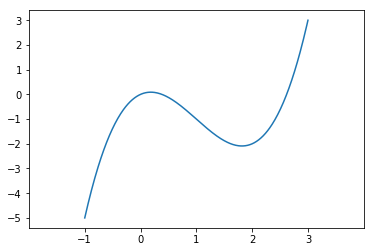

In [42]:
def f(x):
    return x**3 - 3*x**2 + x

x = np.linspace(-1, 3, 400)
y = f(x)

plt.plot(x, y)

plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))

plt.show()

### 데이터 분석에서 많이 사용되는 함수들
* **다항식 함수**(polynomial function)
>* $ f(x) = c_0 + c_1 x + c_2 x^2 + \cdots + c_n x^n $

* **지수 함수**(exponential function)
>* $ y = e^x $
>* 파이썬에서 자연 상수값은 np.e로 구할 수 있다
>* 밑이 $e$가 아닌 경우, $ y = a^x = (e^{\log a})^x = e^{x \log a} $
>* $ e^{x_1} e^{x_2} = e^{x_1 + x_2}$

* **로그 함수**(logarithmic function)
>* $ y = \log x $
>* $x$값, 즉 입력변수값이 양수이어야 한다. 0이거나 음수이면 정의되지 않는다.
>* $x > 1$ 이면 양수 / $x=1$일 때 $y=0$ / $x < 1$ 이면 음수
>* 로그 함수의 성질1: 로그 함수는 곱셈을 덧셈으로 변환한다
>  * $ \log{\left(\prod_i x_i\right)} = \sum_i \left(\log{x_i}\right) $
>  * $ \log x^n = n \log x $
>* 로그 함수의 성질2: 로그 함수를 적용해도 함수의 최고점, 최저점의 위치는 변하지 않는다 (최적화에 사용)
>  * $ \arg\max_x f(x) = \arg\max_x \log f(x) $
>* 로그 함수의 성질3: 로그 함수는 0부터 1까지의 작은 값을 확대해서 보여준다

> # 4.1. 함수의 미분

### 함수의 미분

$$ f'(x) = \lim_{dx \to 0} \frac{f(x+dx)-f(x)}{dx} $$

### 기본적인 미분 공식
$$ \dfrac{d}{dx}(c) = 0 $$

$$ \dfrac{d}{dx}(x^n) = n x^{n-1} $$

$$ \dfrac{d}{dx}(\log x) = \dfrac{1}{x} $$

$$ \dfrac{d}{dx}(e^x) = e^x $$

$$ \dfrac{d}{dx}\left(c_1 f_1 + c_2 f_2 \right) = c_1 \dfrac{df_1}{dx} + c_2 \dfrac{df_2}{dx}$$

$$  \dfrac{d}{dx}\left( f  \cdot g \right) =  \dfrac{df}{dx} \cdot g + f \cdot  \dfrac{dg}{dx} $$

$$ \dfrac{d}{dx}h(g(x)) = \dfrac{dh}{dg} \cdot \dfrac{dg}{dx} $$

### 2차 도함수 (2nd derivative)
$$ f'' = \dfrac{d^2y}{dx^2} $$
* 2차 도함수가 양수이면 아래로 볼록(convex)
* 2차 도함수가 음수이면 아래로 오목(concave)

### 편미분 (partial derivative)
$$ f_x(x,y) = \dfrac{\partial f}{\partial x}$$
$$ f_y(x,y) = \dfrac{\partial f}{\partial y} $$
* 특정 독립 변수로 편미분하는 경우, 다른 독립 변수는 상수로 취급한다

### 편미분의 2차 도함수

$$ f_{xx}(x,y) = \dfrac{\partial^2 f}{\partial x^2} $$

$$ f_{yy}(x,y) = \dfrac{\partial^2 f}{\partial y^2} $$

$$ f_{xy}(x,y) = \dfrac{\partial^2 f}{\partial y \partial x} $$

$$ f_{yx}(x,y) = \dfrac{\partial^2 f}{\partial x \partial y} $$

### 미분 - sympy

In [43]:
import sympy

# Juypter 노트북에서 수학식의 LaTeX 표현을 위해 필요함
sympy.init_printing(use_latex='mathjax') 

# symbols 명령을 통해 x가 심볼임을 알려준다
x = sympy.symbols('x')

f = x * sympy.exp(x)

# 함수의 미분
sympy.diff(f)

# 미분한 결과를 단순화
sympy.simplify(sympy.diff(f))

         x
(x + 1)⋅ℯ 

### 편미분 - sympy

In [44]:
x, y = sympy.symbols('x y')
f = x ** 2 + x * y + y ** 2

# x와 y에 각각에 대해 편미분
sympy.diff(f, x)
sympy.diff(f, y)

x + 2⋅y

In [45]:
x, mu, sigma = sympy.symbols('x mu sigma')
f = sympy.exp((x - mu) ** 2 / sigma ** 2)
sympy.simplify(sympy.diff(f,x))

                   2
            (μ - x) 
            ────────
                2   
               σ    
2⋅(-μ + x)⋅ℯ        
────────────────────
          2         
         σ          

> # 4.2. 함수의 적분

### 부정적분(indefinite integration)
* $C$는 적분 상수를 의미
$$ \dfrac{dF(x)}{dx} = f(x) \;\;\leftrightarrow\;\; F(x) = \int_{}^{} f(x) dx + C $$
$$$$
$$ 
\begin{matrix}
\dfrac{\partial F_1(x)}{\partial x} = f(x) & \leftrightarrow & F_1(x, y) = \int_{}^{} f(x, y) dx + C(y)\\
\dfrac{\partial F_2(x)}{\partial y} = f(x) & \leftrightarrow & F_2(x, y) = \int_{}^{} f(x, y) dy + C(x) \\ 
\dfrac{\partial^2 F_3(x)}{\partial x \partial y} = f(x) & \leftrightarrow & F_3(x, y) = \iint_{}^{} f(x, y) dxdy  + C
\end{matrix}
$$

### 부정적분 - sympy

In [46]:
import sympy

sympy.init_printing(use_latex='mathjax')  

x = sympy.symbols('x')
f = x * sympy.exp(x) + sympy.exp(x)

sympy.integrate(f)

   x
x⋅ℯ 

### 정적분(definite integration)

* 독립변수 $x$가 $[a, b]$인 구간에서 함수 $f(x)$의 값과 $x$축이 이루는 면적

$$\int_{b}^{a} f(x) dx $$

### 미적분학의 기본 정리(Fundamental Theorem of Calculus)
* 대부분의 경우 어느 함수의 정적분은 부정적분으로 구한 함수 $F(x)$를 이용하여 구할 수 있다

$$ \int_{b}^{a} f(x) dx = F(a) - F(b)  $$

### 정적분 - sympy
* 정적분 방법1: sympy로 부정적분을 한 후 미적분학의 기본 정리 사용
* 장적분 방법2: 기존 함수의 면적을 잘게 쪼개어 면적을 근사적으로 구함 (numerical integration)

In [47]:
# 부정적분을 통해 계산하기
x, y = sympy.symbols('x y')
f = x ** 3 - 3 * x ** 2 + x + 6
F = sympy.integrate(f)
(F.subs(x, 2) - F.subs(x,0)).evalf()

10.0000000000000

In [48]:
# 바로 정적분 계산하기
def f(x):
    return x ** 3 - 3 * x ** 2 + x + 6

sp.integrate.quad(f, 0, 2)
# 두 번쨰 값은 오차의 상한값을 의미

(10.0, 1.1102230246251565e-13)

### 다변수 정적분 (변수가 2개인 경우)
* 방법1: 하나의 변수로 적분하고 나머지 변수를 정해지지 않은 상수로 취급
* 방법2: 두 변수에 대해 모두 적분 (부피를 구하는 문제)

> # 5. 행렬의 미분
* 행렬 미분: 행렬을 입력이나 출력으로 가지는 함수를 미분하는 것
* 엄밀하게는 편미분(partial derivative)에 해당
* 분자 중심 표현법(Numerator-layout notation)과 분모 중심 표현법(Denominator-layout notation)이 있음
* 데이터 분석에는 주로 분모 중심 표현법을 사용

### 1) 스칼라를 벡터로 미분 - 그레디언트 벡터(gradient vector)

$$
\nabla y = 
\frac{\partial y}{\partial \mathbf{x}} =
\begin{bmatrix}
\dfrac{\partial y}{\partial x_1}\\
\dfrac{\partial y}{\partial x_2}\\
\vdots\\
\dfrac{\partial y}{\partial x_N}\\
\end{bmatrix}
$$

### 미분 규칙1: 선형 모형
* 선형 모형을 미분하면 가중치 벡터가 된다
* 증명은 부록-1. 참조
$$\frac{\partial \mathbf{w}^{T}\mathbf{x}}{\partial \mathbf{x}} = \frac{\partial \mathbf{x}^{T}\mathbf{w}}{\partial \mathbf{x}} = \mathbf{w}$$ 

### 미분 규칙2: 이차 형식
* 이차 형식을 미분하면 행렬과 벡터의 곱으로 나타난다
* 증명은 부록-2. 참조
$$\frac{\partial \mathbf{x}^{T}\mathbf{A}\mathbf{x}}{\partial \mathbf{x}} = (\mathbf{A} + \mathbf{A}^{T})\mathbf{x}$$

### 그레디언트 벡터의 표현1: surface plot

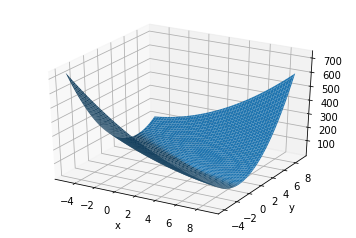

In [49]:
def f(x, y):
    return 2 * x**2 + 6 * x * y + 7 * y**2 - 26 * x - 54 * y + 107

xx = np.linspace(-5, 9, 100)
yy = np.linspace(-4, 9, 100)
X, Y = np.meshgrid(xx, yy)

Z = f(X, Y)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
fig.gca(projection='3d').plot_surface(X, Y, Z)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 그레디언트 벡터의 표현2: quiver plot
> * 그레디언트 벡터의 방향: 함수 곡면의 기울기가 가장 큰 방향
> * 그레디언트 벡터의 크기: 기울기

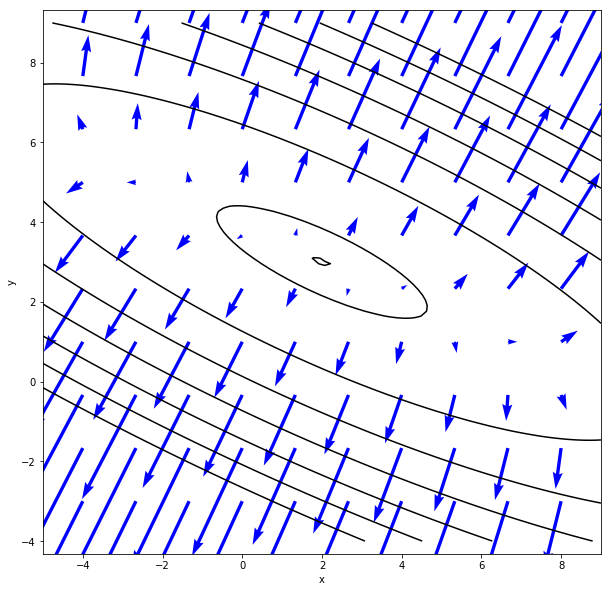

In [50]:
def gx(x, y):
    return 4 * x + 6 * y - 26

def gy(x, y):
    return 6 * x + 14 * y - 54

xx2 = np.linspace(-4, 8, 10)
yy2 = np.linspace(-3, 9, 10)
X2, Y2 = np.meshgrid(xx2, yy2)

GX = gx(X2, Y2)
GY = gy(X2, Y2)

plt.figure(figsize=(10,10))
plt.contour(X, Y, Z, levels=[0.05, 5, 50, 100, 150, 200, 250, 300], colors='k')
plt.quiver(X2, Y2, GX, GY, color='blue', scale=400)
plt.axis("equal")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 2) 벡터를 스칼라로 미분

$$
\mathbf{y} =
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots\\
y_M \\
\end{bmatrix}
= \mathbf{f}(x)
$$

$$\downarrow$$

$$
\frac{\partial \mathbf{y}}{\partial x} = \left[
\frac{\partial y_1}{\partial x}
\frac{\partial y_2}{\partial x}
\cdots
\frac{\partial y_M}{\partial x}
\right].
$$

### 3) 벡터를 벡터로 미분
* 독립 변수 각각과 종속 변수 각각의 조합에 대해 모두 미분이 존재
* **자코비안 행렬(Jacobian matrix)**: 이렇게 만들어진 도함수의 행렬
* *행/열의 방향에 유의*




$$
\mathbf J = \frac{d\mathbf y}{d\mathbf x} = \begin{bmatrix}
    \dfrac{\partial y_1}{\partial \mathbf x}^T \\ \cdots \\ \dfrac{\partial y_M}{\partial \mathbf x}^T \end{bmatrix}
= \begin{bmatrix}
    \dfrac{\partial y_1}{\partial x_1} & \cdots & \dfrac{\partial y_1}{\partial x_N}\\
    \vdots & \ddots & \vdots\\
    \dfrac{\partial y_M}{\partial x_1} & \cdots & \dfrac{\partial y_M}{\partial x_N} \end{bmatrix}
$$


### 4) 스칼라를 행렬로 미분

$$
\frac{\partial y}{\partial \mathbf{X}} =
\begin{bmatrix}
\frac{\partial y}{\partial x_{1,1}} & \frac{\partial y}{\partial x_{1,2}} & \cdots & \frac{\partial y}{\partial x_{1,N}}\\
\frac{\partial y}{\partial x_{2,1}} & \frac{\partial y}{\partial x_{2,2}} & \cdots & \frac{\partial y}{\partial x_{2,N}}\\
\vdots & \vdots & \ddots & \vdots\\
\frac{\partial y}{\partial x_{M,1}} & \frac{\partial y}{\partial x_{M,2}} & \cdots & \frac{\partial y}{\partial x_{M,N}}\\
\end{bmatrix}
$$

### 스칼라를 행렬로 미분 - 2차 도함수
* 이렇게 구해진 행렬을 **헤시안 행렬**(Hessian matrix)이라고 한다
$$$$
$$
H =
\begin{bmatrix}
  \dfrac{\partial^2 f}{\partial x_1^2} & \dfrac{\partial^2 f}{\partial x_1\,\partial x_2} & \cdots & \dfrac{\partial^2 f}{\partial x_1\,\partial x_N} \\
  \dfrac{\partial^2 f}{\partial x_2\,\partial x_1} & \dfrac{\partial^2 f}{\partial x_2^2} & \cdots & \dfrac{\partial^2 f}{\partial x_2\,\partial x_N} \\
  \vdots & \vdots & \ddots & \vdots \\
  \dfrac{\partial^2 f}{\partial x_N\,\partial x_1} & \dfrac{\partial^2 f}{\partial x_N\,\partial x_2} & \cdots & \dfrac{\partial^2 f}{\partial x_N^2}
\end{bmatrix}
$$

### 미분 규칙3: 행렬 곱의 대각성분
$$ \text{tr}(\mathbf{B}\mathbf{A}) = \sum_{i=1}^N \sum_{j=1}^N b_{ji} a_{ij} \rightarrow \dfrac{\partial \text{tr} (\mathbf{B}\mathbf{A})}{\partial a_{ij}} = b_{ji} = \mathbf{B}^T$$ 

### 미분 규칙4: 행렬식의 로그

$$ \dfrac{\partial}{\partial a_{i,j}} \det \mathbf{A} = C_{i,j} $$

$$ \dfrac{\partial}{\partial \mathbf{A}} \det \mathbf{A} = C = (\det \mathbf{A}) (\mathbf{A}^{-1})^T  $$

$$ \dfrac{d}{dx} \log f(x) = \dfrac{f'(x)}{f(x)} = \dfrac{(\det \mathbf{A}) (\mathbf{A}^{-1})^T}{\det \mathbf{A}} = (\mathbf{A}^{-1})^T $$

$$ \dfrac{\partial \log \det \mathbf{A} }{\partial \mathbf{A}} = (\mathbf{A}^{-1})^T $$

> # 6. 최적화

### 최적화(optimization)란?

* 특정한 제한 조건(constraint)을 만족시키면서 함수 $f$의 값을 최소화하는 변수 $x$의 값 $x^{\ast}$를 찾는 것
* 최대화 문제는 $f(x)$ 를 $-f(x)$ 로 바꾸면 풀 수 있으므로 보통 최소화의 경우만 고려

$$ x^{\ast} = \underset{x}{\operatorname{arg\,min}} \; f(x) $$

* 이 때 최소화 혹은 최대화 하려는 함수를 **목적 함수(objective function)** 또는 **비용 함수(cost function)**, **손실 함수(loss function)**라고 한다.

### 방법1: 그리드 서치(grid search)
* $x$의 값을 여러 개 넣어보고 그 중 가장 작은 값은 선택
* 간단하지만 많은 계산량 요구

### 방법2: 수치적 최적화(numerical optimization)
* 다음과 같은 두 가지 알고리즘으로 구성됨
* 1) 어떤 위치 $x_k$를 시도한 뒤, 다음 번에 시도할 위치 $x_{k+1}$을 찾는 알고리즘
* 2) 현재 위치 $x_k$가 최적점인지 판단하는 알고리즘

> # 6.1. 수치적 최적화

### 기울기 필요 조건
* 현재 위치가 최적점인지 판단하는 알고리즘
* 아래의 조건은 **필요 조건**이다 (최적점을 보장하지는 않는다)
* 단일 변수: $\dfrac{df(x)}{dx} = 0 $
* 다변수: $ \nabla f = 0 $

### 수치적 최적화 - SGD(Steepest Gradient Descent) 방법
* 스텝 사이즈($\mu$)를 잘 설정해야 함
* 너무 작으면 maximum iteration 초과, 너무 크면 over-shooting
$$$$
$$ x_{k+1} = x_{k} - \mu \nabla f(x_k) = x_{k} - \mu g(x_k)  $$

### 수치적 최적화 - 그 외의 방법
* CG(conjugated gradient) 방법
* BFGS(Broyden–Fletcher–Goldfarb–Shanno) 방법
* 매커니즘:
> * 최적화하려는 영역을 2차 함수와 비슷한 모양으로 가정
> * 1차 도함수인 그레디언트와 2차 도함수인 헤시안 행렬 정보를 모두 활용해서 최적점 탐색
* 사용방법:
> * sp.optimize.minimize 함수에서 `method='CG'` 또는 `method='BFGS'` 등을 통해 사용 가능

### 수치적 최적화 - 전역 최적화 문제
* 도달한 최적점이 국소 최적점(local minima)인지 전역 최적점(global minimum)인지 확신할 수 있는 방법이 없음
* 초기 추정값 및 알고리즘, 파라미터를 잘 설정해야 함

### 최적화 - scipy
* 최적화 명령 'minimize'사용 / 세부적인 알고리즘은 'method'인수로 설정 / default 알고리즘은 BFGS 방법
* 다변수 함수를 최적화하는 경우 목적 함수가 벡터 인수를 가짐

In [51]:
def f2(x):
    return (1 - x[0])**2 + 100.0 * (x[1] - x[0]**2)**2

result = sp.optimize.minimize(f2, (-2, -2))
print(result)
x0 = result['x']
x0

      fun: 1.2197702024999478e-11
 hess_inv: array([[0.50957143, 1.01994476],
       [1.01994476, 2.04656074]])
      jac: array([ 9.66714798e-05, -4.64005023e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 496
      nit: 57
     njev: 121
   status: 2
  success: False
        x: array([0.99999746, 0.99999468])


array([0.99999746, 0.99999468])

> # 6.2. 제한 조건이 있는 최적화(contrained optimization)

### 등식 제한 조건 - 라그랑주 승수법(Lagrange multiplier)

$$ x^{\ast} = \text{arg} \min_x f(x) ,\,\,\,\ \text{subject to } \;\; g(x)=0$$

$$\downarrow$$

$$h(x, \lambda) = f(x) + \lambda g(x)$$

$$\downarrow$$

$$ \dfrac{\partial (f + \lambda g)}{\partial x_1} = \dfrac{\partial f}{\partial x_1} + \lambda\dfrac{\partial g}{\partial x_1} = 0 $$


$$ \dfrac{\partial (f + \lambda g)}{\partial x_2} = \dfrac{\partial f}{\partial x_2} + \lambda\dfrac{\partial g}{\partial x_2}= 0 $$
$$ \vdots $$
$$ \dfrac{\partial (f + \lambda g)}{\partial x_N} = \dfrac{\partial f}{\partial x_N} + \lambda\dfrac{\partial g}{\partial x_N}= 0 $$

$$ \dfrac{\partial (f + \lambda g)}{\partial \lambda} = g = 0 $$

### 등식 제한 조건 - scipy

In [52]:
def f2logs(x):
    return np.log(x[0]) + np.log(x[1])

def eq_constraint(x):
    return x[0] + x[1] - 1

sp.optimize.fmin_slsqp(f2logs, np.array([1, 1]), eqcons=[eq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1.3862943611198901
            Iterations: 2
            Function evaluations: 8
            Gradient evaluations: 2


array([0.5, 0.5])

### 부등식 제한 조건 - KKT(Karush-Kuhn-Tucker) 조건
* 부등식 제한 조건은 다음의 둘 중 하나에 해당된다
  * 1) 최적화 결과에 전혀 영향을 주지 않는 조건
  * 2) 최적화 결과에 영향을 주는 **등식** 조건
* 따라서 등식 조건에 대한 라그랑주 승수법에 다음의 두 조건을 더하여 사용 가능
  * 1) $  \lambda g = 0 $ ($\lambda$와 $g$중 적어도 하나는 0이어야 한다)
  * 2) $  \lambda \geq 0 $ (실제로 부등식 제한 조건이 있는 문제와 같은 문제임을 보장 - strong duality)

### 부등식 제한 조건 - scipy

In [53]:
def f(x):
    return np.sqrt((x[0] - 3)**2 + (x[1] - 2)**2)

def ieq_constraint(x):
    return np.atleast_1d(1.5 - np.sum(np.abs(x)))

sp.optimize.fmin_slsqp(f, np.array([0, 0]), ieqcons=[ieq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.4748737350439685
            Iterations: 5
            Function evaluations: 20
            Gradient evaluations: 5


array([1.25004696, 0.24995304])

># 6.3. LP 문제와 QP 문제

### Linear Programming 문제
방정식이나 부등식 제한 조건을 가지는 선형 모형(linear model, linear combination)의 값을 최소화하는 문제를 **LP(Linear Programming)** 문제라고 한다.

$$
\begin{eqnarray}
\min_x c^Tx \\
Ax = b \\
x \geq 0
\end{eqnarray}
$$

* 위와 같은 형태를 LP 문제의 기본형(standard form)이라고 한다.
* 마지막 부등식 제한 조건은 벡터 $x$의 모든 원소가 양수거나 0이 되어야 한다는 것을 의미한다. 
* 이러한 문제의 답이 존재하면 문제가 **실현 가능(feasible)**하다고 하고 답이 존재하지 않으면 **실현 불가능(infeasible)**이라고 한다.

### LP - Example

$$
\min_x \begin{bmatrix} -4 & -3 & 0 & 0 & 0 \end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \\
\end{bmatrix}
$$

$$
\begin{bmatrix}
1 & 1 & 1 & 0 & 0 \\
2 & 1 & 0 & 1 & 0 \\
3 & 4 & 0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5
\end{bmatrix}=
\begin{bmatrix}
100 \\ 150 \\ 360
\end{bmatrix}
$$

$$
\begin{bmatrix}
x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5
\end{bmatrix}\geq
\begin{bmatrix}
0 \\ 0 \\ 0 \\ 0 \\ 0
\end{bmatrix}
$$

### LP - extensions
* **CP** (Conic Programming)
  * 일반적인 부등식 제한 조건 대신 특정한 기저 벡터들의 양수 선형 조합에 속해야 한다는 조건
* **IP** (Integer Programming)
  * $x$의 모든 원소가 정수이어야 한다는 조건
* **MIP** (Mixed Integer Programming)
  * $x$의 일부 원소만 정수이어야 한다는 조건

### LP - `scipy`
* Use `scipy.optimize.linprog`
* Parameters `A_eq`, `b_eq` must be specified

In [14]:
A = np.array([[1, 1, 1, 0, 0],
              [2, 1, 0, 1, 0],
              [3, 4, 0, 0, 1]])
b = np.array([100, 150, 350])
c = np.array([-4, -3, 0, 0, 0])

In [15]:
import scipy.optimize
result = sp.optimize.linprog(c, A_eq=A, b_eq=b)
result

     fun: -350.0
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([ 50.,  50.,   0.,   0.,   0.])

### Quadratic Programming 문제
방정식이나 부등식 제한 조건을 가지는 일반화된 이차형식(quadratic form)의 값을 최소화하는 문제를 **QP(Quadratic Programming)** 문제라고 한다.

$$
\begin{eqnarray}
\min_x \dfrac{1}{2}x^TQx + c^Tx \\
Ax = b \\
x \geq 0
\end{eqnarray}
$$

* 마지막 부등식 제한 조건은 벡터 $x$의 모든 원소가 양수거나 0이 되어야 한다는 것을 의미한다. 
* 이러한 문제의 답이 존재하면 문제가 **실현 가능(feasible)**하다고 하고 답이 존재하지 않으면 **실현 불가능(infeasible)**이라고 한다.
* 잔차 제곱합을 최소화하기 위한 데이터 분석 모형은 부가 조건이 있는 경우 대부분 QP 문제가 된다.

> # 부록

### 1. 미분 규칙1: 선형 모형 - 증명
$$ 
\dfrac{\partial (\mathbf{w}^T \mathbf{x})}{\partial \mathbf{x}}=
\begin{bmatrix}
\dfrac{\partial (\mathbf{w}^T \mathbf{x})}{\partial x_1} \\
\dfrac{\partial (\mathbf{w}^T \mathbf{x})}{\partial x_2} \\
\vdots \\
\dfrac{\partial (\mathbf{w}^T \mathbf{x})}{\partial x_N} \\
\end{bmatrix} =
\begin{bmatrix}
\dfrac{\partial (w_1 x_1 + \cancel{w_2 x_2} + \cdots + \cancel{w_N x_N})}{\partial x_1} \\
\dfrac{\partial (\cancel{w_1 x_1} + w_2 x_2 + \cdots + \cancel{w_N x_N})}{\partial x_2} \\
\vdots \\
\dfrac{\partial (\cancel{w_1 x_1} + \cancel{w_2 x_2} + \cdots + w_N x_N)}{\partial x_N} \\
\end{bmatrix} =
\begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_N \\
\end{bmatrix}
= \mathbf{w} 
$$

### 2. 미분 규칙2: 이차 형식 - 증명
$$ 
\begin{eqnarray}
\dfrac{\partial (\mathbf{x}^{T}\mathbf{A}\mathbf{x})}{\partial \mathbf{x}}
&=&
\begin{bmatrix}
\dfrac{\partial (\mathbf{x}^{T}\mathbf{A}\mathbf{x})}{\partial x_1} \\
\dfrac{\partial (\mathbf{x}^{T}\mathbf{A}\mathbf{x})}{\partial x_2} \\
\vdots \\
\dfrac{\partial (\mathbf{x}^{T}\mathbf{A}\mathbf{x})}{\partial x_N} \\
\end{bmatrix} \\
&=&
\begin{bmatrix}
\dfrac{\partial (\sum_{i=1}^{N} \sum_{j=1}^{N} a_{ij} x_i x_j)}{\partial x_1} \\
\dfrac{\partial (\sum_{i=1}^{N} \sum_{j=1}^{N} a_{ij} x_i x_j)}{\partial x_2} \\
\vdots \\
\dfrac{\partial (\sum_{i=1}^{N} \sum_{j=1}^{N} a_{ij} x_i x_j)}{\partial x_N} \\
\end{bmatrix} \\
&=&
\begin{bmatrix}
\dfrac{\partial 
\left(
\begin{matrix}
a_{11}x_1x_1 + a_{12}x_1x_2 + \cdots + a_{1N}x_1x_N + \\
a_{21}x_2x_1 + \cancel{a_{22}x_2x_2} + \cdots + \cancel{a_{2N}x_2x_N} + \\
\cdots  \\
a_{N1}x_Nx_1 + \cancel{a_{N2}x_Nx_2} + \cdots + \cancel{a_{NN}x_Nx_N} 
\end{matrix}
\right)}{\partial x_1} \\
\dfrac{\partial 
\left(
\begin{matrix}
\cancel{a_{11}x_1x_1} + a_{12}x_1x_2 + \cdots + \cancel{a_{1N}x_1x_N} + \\
a_{21}x_2x_1 + a_{22}x_2x_2 + \cdots + a_{2N}x_2x_N + \\
\cdots  \\
\cancel{a_{N1}x_Nx_1} + a_{N2}x_Nx_2 + \cdots + \cancel{a_{NN}x_Nx_N}
\end{matrix}
\right)}{\partial x_2} \\
\vdots \\
\end{bmatrix} 
\\
&=&
\begin{bmatrix}
\sum_{i=1}^{N} a_{1i} x_i + \sum_{i=1}^{N} a_{i1} x_i\\
\sum_{i=1}^{N} a_{2i} x_i + \sum_{i=1}^{N} a_{i2} x_i\\
\vdots \\
\sum_{i=1}^{N} a_{Ni} x_i + \sum_{i=1}^{N} a_{iN} x_i\\
\end{bmatrix} \\
&=&
\begin{bmatrix}
\sum_{i=1}^{N} a_{1i} x_i\\
\sum_{i=1}^{N} a_{2i} x_i\\
\vdots \\
\sum_{i=1}^{N} a_{Ni} x_i\\
\end{bmatrix}
+
\begin{bmatrix}
\sum_{i=1}^{N} a_{i1} x_i \\
\sum_{i=1}^{N} a_{i2} x_i \\
\vdots \\
\sum_{i=1}^{N} a_{iN} x_i \\
\end{bmatrix} \\
&=&
\mathbf{A} \mathbf{x}  + \mathbf{A}^T \mathbf{x} 
=
(\mathbf{A} + \mathbf{A}^T)\mathbf{x} 
\end{eqnarray}
$$